# My beautiful notebook 🚀

In [157]:
import numpy as np
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [2]:
lift = np.arange(0.01, 0.05, 0.01)
benefits = pd.DataFrame({'lift': lift, 
                        'benefit': 100000*20*lift})
benefits

,lift,benefit
0,0.01,20000.0
1,0.02,40000.0
2,0.03,60000.0
3,0.04,80000.0


In [3]:
mandays = np.arange(20, 60, 10)

costs = pd.DataFrame({'mandays':mandays, 
                     'cost': mandays*500*3})
costs

,mandays,cost
0,20,30000
1,30,45000
2,40,60000
3,50,75000


In [4]:
benefits['ones'] = 1
costs['ones'] = 1

In [14]:
df = benefits.merge(costs, on='ones').drop('ones', axis=1)
df['ROI'] = df.benefit - df.cost
df

,lift,benefit,mandays,cost,ROI
0,0.01,20000.0,20,30000,-10000.0
1,0.01,20000.0,30,45000,-25000.0
2,0.01,20000.0,40,60000,-40000.0
3,0.01,20000.0,50,75000,-55000.0
4,0.02,40000.0,20,30000,10000.0
5,0.02,40000.0,30,45000,-5000.0
6,0.02,40000.0,40,60000,-20000.0
7,0.02,40000.0,50,75000,-35000.0
8,0.03,60000.0,20,30000,30000.0
9,0.03,60000.0,30,45000,15000.0


In [15]:
df.pivot(index='lift', columns='mandays', values='ROI')

mandays,20,30,40,50
lift,,,,
0.01,-10000.0,-25000.0,-40000.0,-55000.0
0.02,10000.0,-5000.0,-20000.0,-35000.0
0.03,30000.0,15000.0,0.0,-15000.0
0.04,50000.0,35000.0,20000.0,5000.0


In [46]:
df_double_index = df.set_index(['lift', 'mandays']).ROI
sensitivity_matrix = df_double_index.unstack()
sensitivity_matrix

mandays,20,30,40,50
lift,,,,
0.01,-10000.0,-25000.0,-40000.0,-55000.0
0.02,10000.0,-5000.0,-20000.0,-35000.0
0.03,30000.0,15000.0,0.0,-15000.0
0.04,50000.0,35000.0,20000.0,5000.0


In [51]:
sensitivity_matrix.style.applymap(lambda cell: 'color: red' if cell < 0 else 'font-weight: bold')

mandays,20,30,40,50
lift,,,,
0.01,-10000.000000,-25000.000000,-40000.000000,-55000.000000
0.02,10000.000000,-5000.000000,-20000.000000,-35000.000000
0.03,30000.000000,15000.000000,0.000000,-15000.000000
0.04,50000.000000,35000.000000,20000.000000,5000.000000


## `args` and `kwargs`

In [90]:
def foo(required, *args, **kwargs):
    """This is the function docstring"""
    print(f"Required argument: {required}")
    if args:
        print(f"ARGS: {args}")
    if kwargs:
        print(f"KWARGS: {kwargs}")

In [75]:
foo(1, 2, 3, 4, 5, "this is text", theta=0.3, keyword="value", something="something")

Required argument: 1
ARGS: (2, 3, 4, 5, 'this is text')
KWARGS: {'theta': 0.3, 'keyword': 'value', 'something': 'something'}


In [83]:
a_list = [1, 2, 3]
a_dict = {'theta': 0.3, 'keyword': 'value', 'something': 'something'}

In [91]:
foo(1, *a_list, **a_dict) # => foo(theta=0.3, keyword=value', something=something')

Required argument: 1
ARGS: (1, 2, 3)
KWARGS: {'theta': 0.3, 'keyword': 'value', 'something': 'something'}


In [104]:
class Student:
    school = 'lewagon'
    def __init__(self, name, age, **kwargs):
        """What kwargs are accepted?"""
        self.name = name
        self.age = age
        self.__dict__.update(kwargs)

In [106]:
Student('Adrien', 22, nationality='French', cursus='Data Science', whatever="value").__dict__

{'name': 'Adrien',
 'age': 22,
 'nationality': 'French',
 'cursus': 'Data Science',
 'whatever': 'value'}

In [102]:
new_dict = { 'a': 1, 'b': 2, 'key': 'value' }
new_dict.update({ 'c': 3, 'd': 4})

In [103]:
new_dict

{'a': 1, 'b': 2, 'key': 'value', 'c': 3, 'd': 4}

In [108]:
class DataStudent(Student):
    batch = 'data'    
    def __init(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

In [111]:
DataStudent('Adrien', 22).batch

'data'

In [112]:
a_string = 'text'

In [113]:
a_string = 2

In [124]:
def hello(number: pd.Series) -> pd.Series:
    return number ** 2

In [126]:
hello('test')

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

## Interaction

In [140]:
from ipywidgets import interact
from matplotlib import pyplot as plt

@interact
def plot_polynom(a=[0,1,2,3], b=2, add_grid=False):
    x = np.arange(-10, 10, 0.1)
    y = a*x**3+ b*x**2    
    if add_grid:
        plt.grid()
    plt.plot(x,y); plt.xlim(xmin=-10, xmax=10); plt.ylim(ymin=-100, ymax=100)

interactive(children=(Dropdown(description='a', options=(0, 1, 2, 3), value=0), IntSlider(value=2, description…

### Decorators

In [ ]:
# df.apply(nps_score)

In [151]:
def my_decorator(function):
    def new_function():
        print("before calling the original function")
        print(function())
        print("after calling")
    return new_function


@my_decorator
def hello():
    return f"Hello"
    
# hello = my_decorator(hello)

hello()

before calling the original function
Hello
after calling


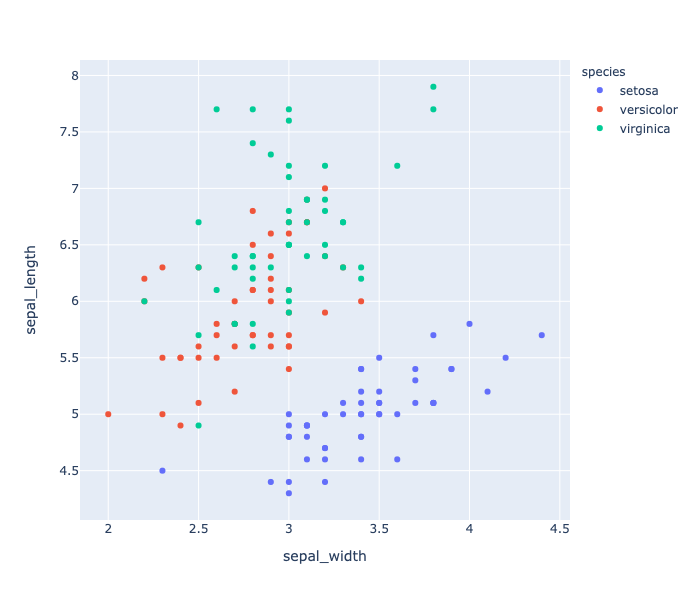

In [158]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
width=800,
height=600)
fig.show()